In [125]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import set_option

#import the required libraries for plotting
from matplotlib import pyplot
from pandas.tools.plotting import scatter_matrix

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

#import the required ML libraries
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.preprocessing import LabelEncoder # For categorical variables
from sklearn.preprocessing import OneHotEncoder


#import the performance evaluation modules
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


The following section of code is used to read the files. 

In [126]:
trainFile = pd.read_csv("../input/train.csv")
print(type(trainFile))
gender_submissionFile = pd.read_csv("../input/gender_submission.csv")
testFile = pd.read_csv("../input/test.csv")
trainFile.head()

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


Print a list of counts for categorical variables.

In [127]:
print("List of all the columns: ")
print(trainFile.columns)
print("\n")
print(trainFile['Survived'].value_counts())
print(trainFile['Sex'].value_counts())
print(trainFile['Pclass'].value_counts())
#print(trainFile['Cabin'].value_counts())
print(trainFile['Embarked'].value_counts())




List of all the columns: 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


0    549
1    342
Name: Survived, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


Find and print the correlation between variables

In [128]:
set_option('display.width', 100)
set_option('precision', 3)
correlations = trainFile.corr(method = 'pearson')
print(correlations['Survived'].sort_values(ascending=False))
sknewness = trainFile.skew()
print(sknewness)

Survived       1.000
Fare           0.257
Parch          0.082
PassengerId   -0.005
SibSp         -0.035
Age           -0.077
Pclass        -0.338
Name: Survived, dtype: float64
PassengerId    0.000
Survived       0.479
Pclass        -0.631
Age            0.389
SibSp          3.695
Parch          2.749
Fare           4.787
dtype: float64


**Data Visualization**

Plot the Histogram for all the attributes of the dataframe trainFile. 

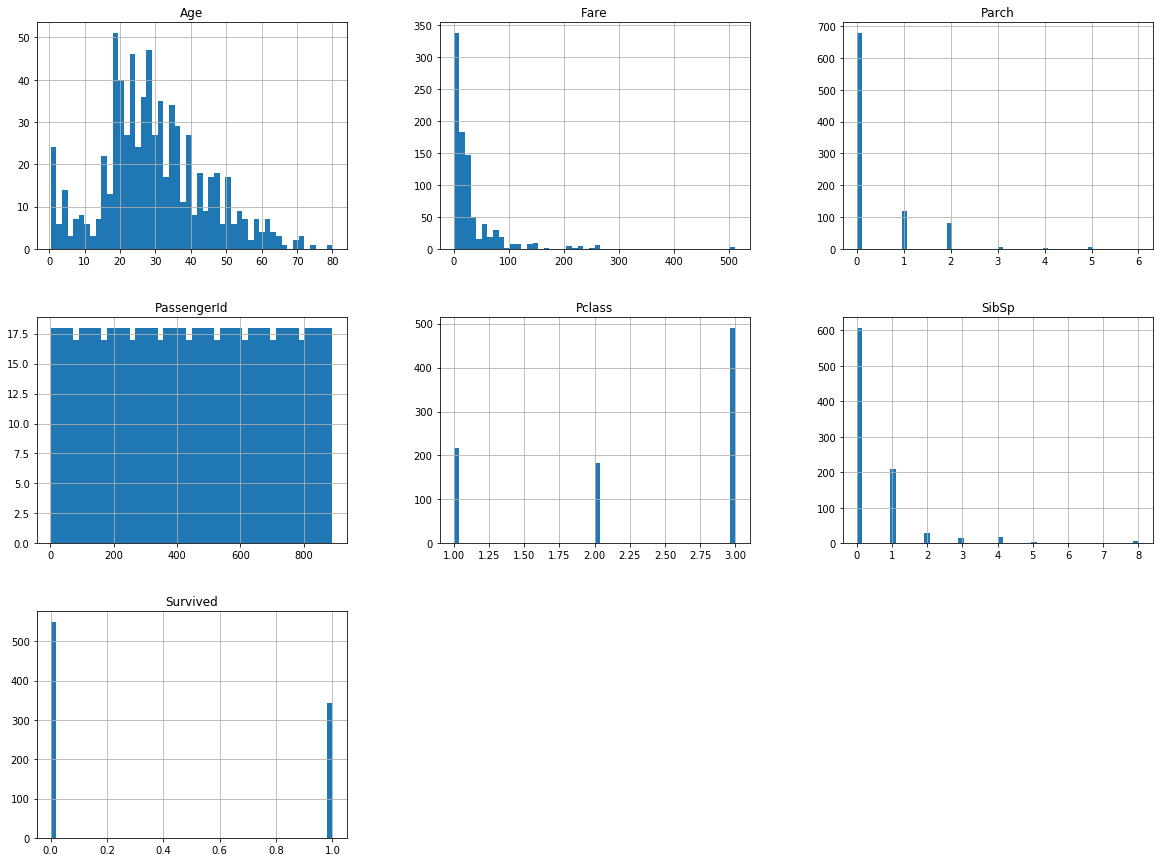

In [129]:
trainFile.hist(bins = 50,figsize = (20,15))
pyplot.show()

Density Plots: Helps to visualize the data more clearly than the histogram.

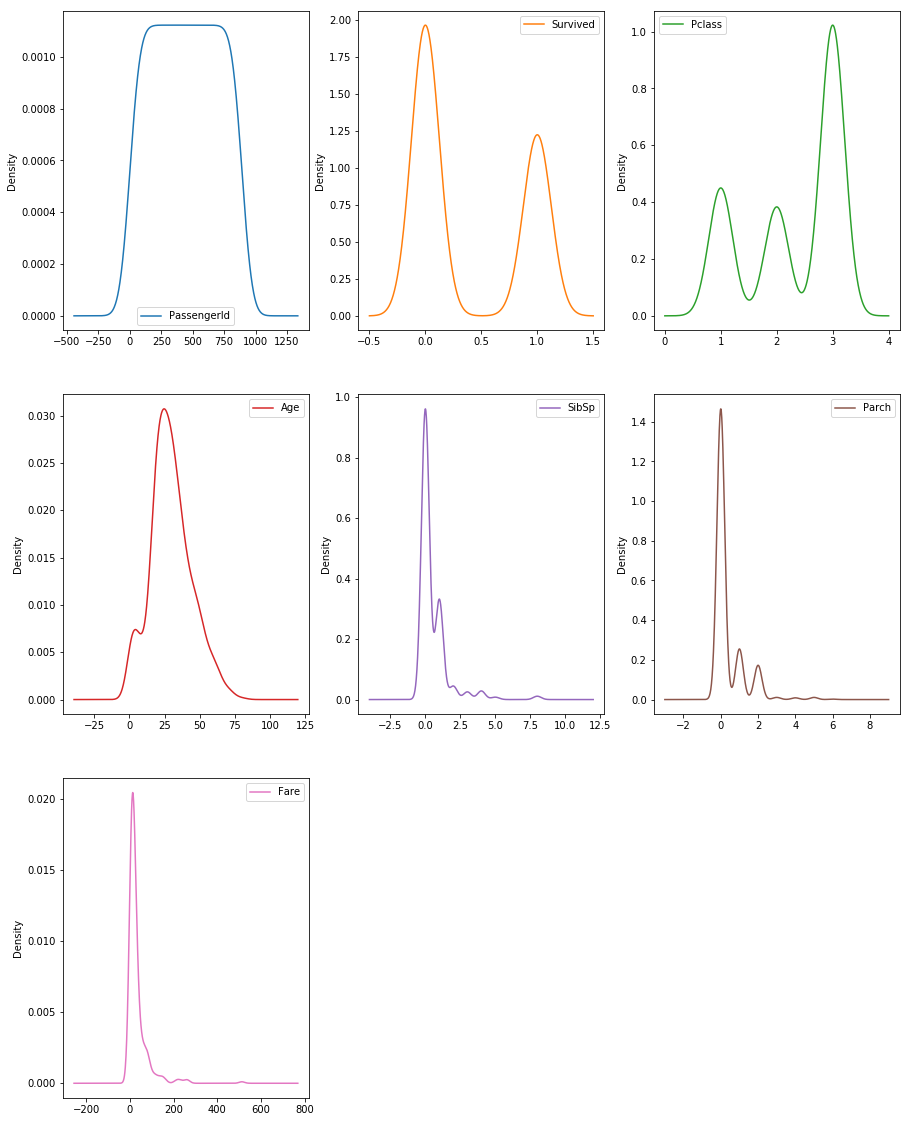

In [130]:
trainFile.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize = (15,20))
pyplot.show()

Box and Whisker Plots

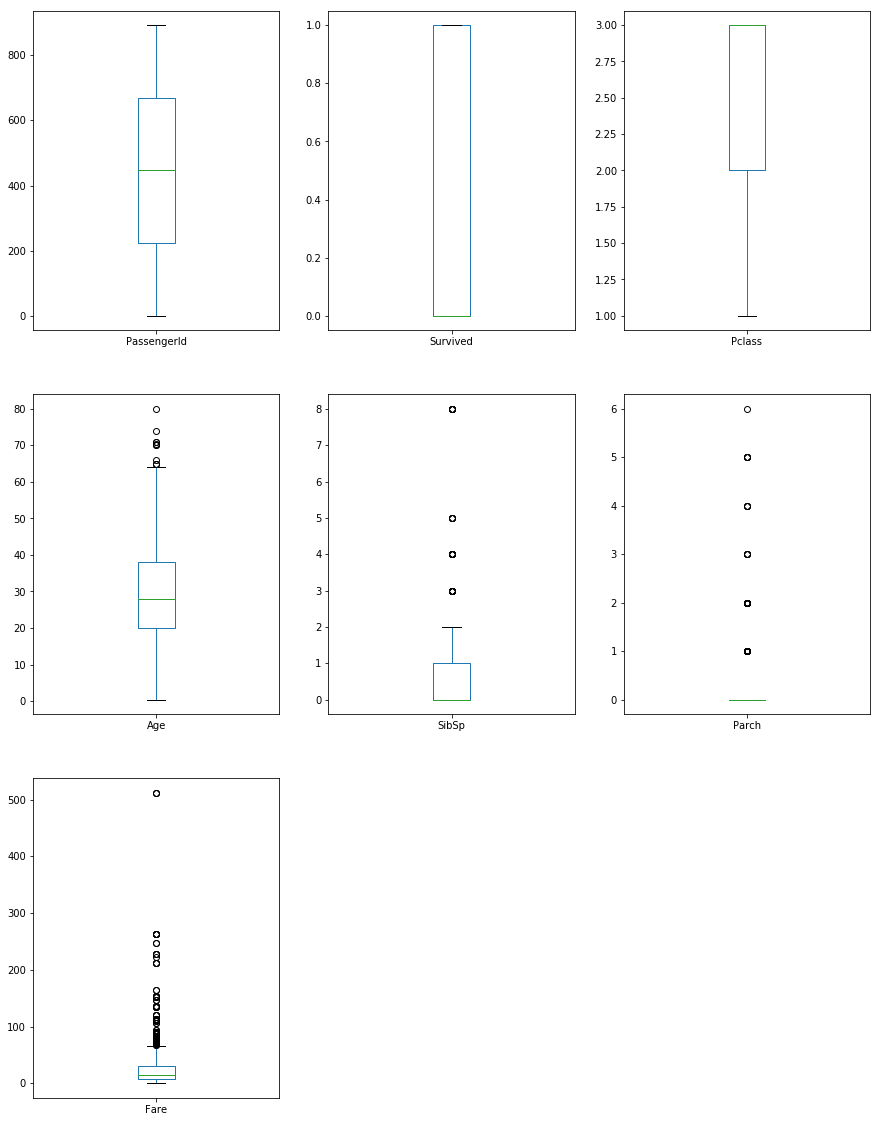

In [131]:
trainFile.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=(15,20))
pyplot.show()

Plotting a scatter plot for Age in x and Fares in y. This plot is to see what age groups of people prefer paying high fares and what prefer paying low fares.   
There is a high density for low fares in the age group between 20 to 40, which means people of this age group prefer paying low fares for the voyage.    
Also, a good correlation between fares and price is seen. The red dots resemble class 3 (lower fare) is present at the bottom of the graph. The blue dots (which resemble class 2 and 3(more bluish)) are present at the top part of the graph. 

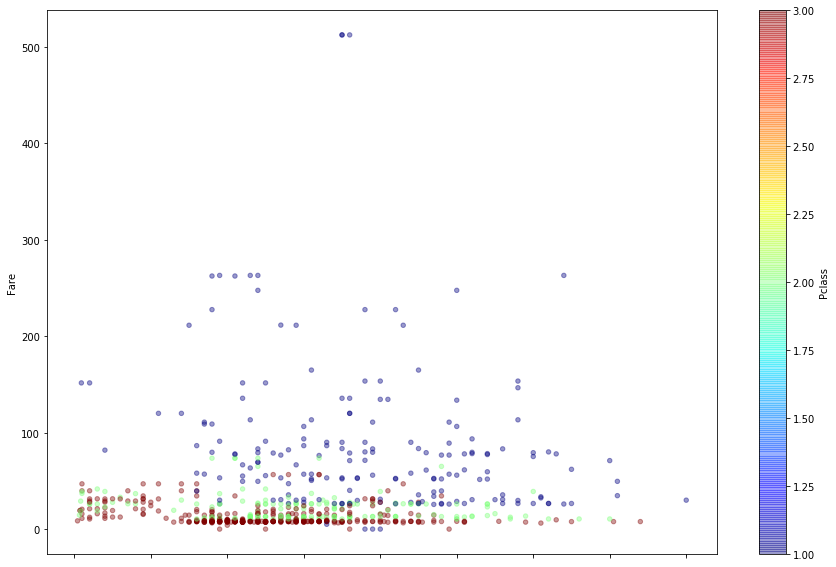

In [132]:
trainFile.plot(kind="scatter", x="Age", y="Fare", alpha=0.4,c="Pclass",cmap=pyplot.get_cmap("jet"),colorbar=True,figsize = (15,10))
pyplot.xlabel("Age")
pyplot.show()

MultiVariate Plots: Correlation Matrix Plot, Scatter Diagram Plot

Correlation Matrix Plot:

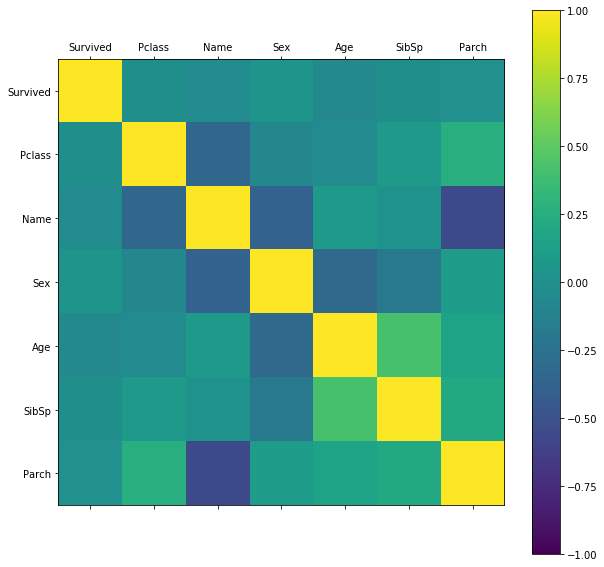

In [133]:
fig = pyplot.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_xticklabels(trainFile.columns)
ax.set_yticklabels(trainFile.columns)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

Scatter Plot:

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


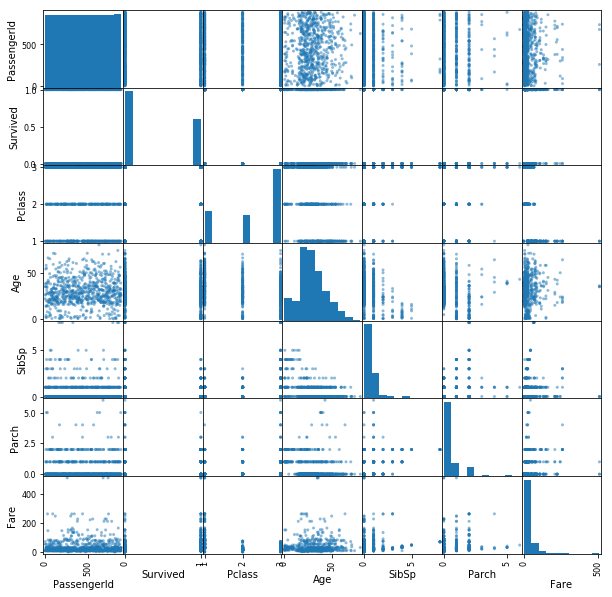

In [134]:
scatter_matrix(trainFile,figsize = (10,10))
pyplot.show()

Find out the count of null values for each attributes.

In [135]:
trainFile.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Charters, Mr. David",male,347082,B96 B98,S
freq,1,577,7,4,644


In [136]:
trainFile.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Describe our train dataset. For Object Types (Strings and Timestamps), describe outputs count, unique, top and freq. 

Since the "Survived" column is binary - 0,1 , the mean value is the percentage of the people who survived.

In [137]:
trainFile[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


Sex and Survived Analysis

In [138]:
trainFile[['Sex','Survived']].groupby(['Sex'],as_index = False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742
1,male,0.189


In [139]:
trainFile[['SibSp','Survived']].groupby(['SibSp'],as_index = False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.536
2,2,0.464
0,0,0.345
3,3,0.250
4,4,0.167
5,5,0.000
6,8,0.000


Calculate the median of Age column and fill the missing values of Age with the median. 

In [140]:
fillValues = trainFile["Age"].median(axis=0)
fillValues
trainFile['Age'].fillna(fillValues, inplace = True)
trainFile.head(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.458,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.071,NaN,C


Drop the unwanted columns which do not contribute for analysis.

In [141]:
#trainFile.drop('Cabin', inplace = True)
trainFile.drop(['PassengerId','Cabin','Ticket'],axis = 1, inplace = True)


In [142]:
trainFile.drop(['Name'],axis = 1, inplace = True)
trainFile.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,71.283,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S
5,0,3,male,28.0,0,0,8.458,Q
6,0,1,male,54.0,0,0,51.862,S
7,0,3,male,2.0,3,1,21.075,S
8,1,3,female,27.0,0,2,11.133,S
9,1,2,female,14.0,1,0,30.071,C


Convert categorical variables into Numeric variables. We have two categorical variables ie. Sex and Embarked. We use LabelEncoder() from scikit learn to do this. 

In [143]:
#Using Label Encoder to encode the two categorical variables - Sex and Embarked
labelencoder_sex = LabelEncoder()
labelencoder_embarked = LabelEncoder()
trainFile['Sex'] = labelencoder_sex.fit_transform(trainFile['Sex'])
trainFile['Embarked'] = labelencoder_embarked.fit_transform(trainFile['Embarked'].astype(str))
trainFile.head(10)
# print(type(trainFile.Age))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.250,2
1,1,1,0,38.0,1,0,71.283,0
2,1,3,0,26.0,0,0,7.925,2
3,1,1,0,35.0,1,0,53.100,2
4,0,3,1,35.0,0,0,8.050,2
5,0,3,1,28.0,0,0,8.458,1
6,0,1,1,54.0,0,0,51.862,2
7,0,3,1,2.0,3,1,21.075,2
8,1,3,0,27.0,0,2,11.133,2
9,1,2,0,14.0,1,0,30.071,0


We now use OneHotEncoder to perform one hot encoding for categorical variables. 

In [144]:
one_hot_encoder_sex = OneHotEncoder(categories='auto')
one_hot_encoder_embarked = OneHotEncoder(categories='auto')
X_sex = one_hot_encoder_sex.fit_transform(trainFile['Sex'].values.reshape(-1,1)).toarray()
X_embarked = one_hot_encoder_sex.fit_transform(trainFile['Embarked'].values.reshape(-1,1)).toarray()
print(X_sex)
print(X_embarked)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


Include the one hot encoded variables into the original dataframe. 

In [145]:
dfOneHot_sex = pd.DataFrame(X_sex, columns = ["Sex_"+str(int(i)) for i in range(X_sex.shape[1])])
trainFile = pd.concat([trainFile, dfOneHot_sex], axis=1)
trainFile.head(10)

# dfOneHot_embarked = pd.DataFrame(X_embarked, columns = ["Embarked"+str(int(i)) for i in range(X.shape[1])])
# trainFile = pd.concat([trainFile, dfOneHot_embarked], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_0,Sex_1
0,0,3,1,22.0,1,0,7.250,2,0.0,1.0
1,1,1,0,38.0,1,0,71.283,0,1.0,0.0
2,1,3,0,26.0,0,0,7.925,2,1.0,0.0
3,1,1,0,35.0,1,0,53.100,2,1.0,0.0
4,0,3,1,35.0,0,0,8.050,2,0.0,1.0
5,0,3,1,28.0,0,0,8.458,1,0.0,1.0
6,0,1,1,54.0,0,0,51.862,2,0.0,1.0
7,0,3,1,2.0,3,1,21.075,2,0.0,1.0
8,1,3,0,27.0,0,2,11.133,2,1.0,0.0
9,1,2,0,14.0,1,0,30.071,0,1.0,0.0


Similarly for Embarked

In [148]:
dfOneHot_embarked = pd.DataFrame(X_embarked, columns = ["Embarked_"+str(int(i)) for i in range(X_embarked.shape[1])])
trainFile = pd.concat([trainFile, dfOneHot_embarked], axis=1)
trainFile.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Embarked_3
0,0,3,1,22.0,1,0,7.250,2,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,0,38.0,1,0,71.283,0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,0,26.0,0,0,7.925,2,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0,35.0,1,0,53.100,2,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,1,35.0,0,0,8.050,2,0.0,1.0,0.0,0.0,1.0,0.0
5,0,3,1,28.0,0,0,8.458,1,0.0,1.0,0.0,1.0,0.0,0.0
6,0,1,1,54.0,0,0,51.862,2,0.0,1.0,0.0,0.0,1.0,0.0
7,0,3,1,2.0,3,1,21.075,2,0.0,1.0,0.0,0.0,1.0,0.0
8,1,3,0,27.0,0,2,11.133,2,1.0,0.0,0.0,0.0,1.0,0.0
9,1,2,0,14.0,1,0,30.071,0,1.0,0.0,1.0,0.0,0.0,0.0


Split the data into training and test datasets. 


In [149]:
#Using Linear Regression
X = trainFile.drop('Survived',axis = 1)
y = trainFile['Survived']
print(type(y))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
#print(y_test)
#print(y_train)



<class 'pandas.core.series.Series'>


Apply ML algorithms

Logistic Regression

In [155]:
clfLogisticRegression = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)
y_pred = clfLogisticRegression.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [156]:
print("Accuracy using Logistic Regression Model is: "+ str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
positives,negatives = confusion_matrix(y_test,y_pred)
TP,FP = positives
FN,TN = negatives
print("Accuracy using confusion matrix is: "+ str((TP+TN)/(TP+FP+FN+TN)))

Accuracy using Logistic Regression Model is: 0.8044692737430168
[[90 15]
 [20 54]]
Accuracy using confusion matrix is: 0.8044692737430168


Decision Tree

In [157]:
clfDecisionTree = tree.DecisionTreeClassifier()
clfDecisionTree = clfDecisionTree.fit(X_train, y_train)
y_pred = clfDecisionTree.predict(X_test)


In [158]:
print("Accuracy using Decision Tree Model is: "+ str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
positives,negatives = confusion_matrix(y_test,y_pred)
TP,FP = positives
FN,TN = negatives
print("Accuracy using confusion matrix is: "+ str((TP+TN)/(TP+FP+FN+TN)))
#acc_decision_tree = round(clfDecisionTree.score(X_test, y_test) * 100, 2)
#print(acc_decision_tree)

Accuracy using Decision Tree Model is: 0.7932960893854749
[[84 21]
 [16 58]]
Accuracy using confusion matrix is: 0.7932960893854749
